<a href="https://colab.research.google.com/github/shbhnkr/StonkPrediction/blob/master/stonks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential 
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [11]:
# Get some Data
df = web.DataReader('AAPL', data_source='yahoo', start='2010-01-01', end='2021-03-03')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.583586
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.594968
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.490066
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.478067
2010-01-08,7.571429,7.466429,7.510714,7.570714,447610800.0,6.521136
...,...,...,...,...,...,...
2021-02-25,126.459999,120.540001,124.680000,120.989998,148199500.0,120.989998
2021-02-26,124.849998,121.199997,122.589996,121.260002,164320000.0,121.260002
2021-03-01,127.930000,122.790001,123.750000,127.790001,115998300.0,127.790001


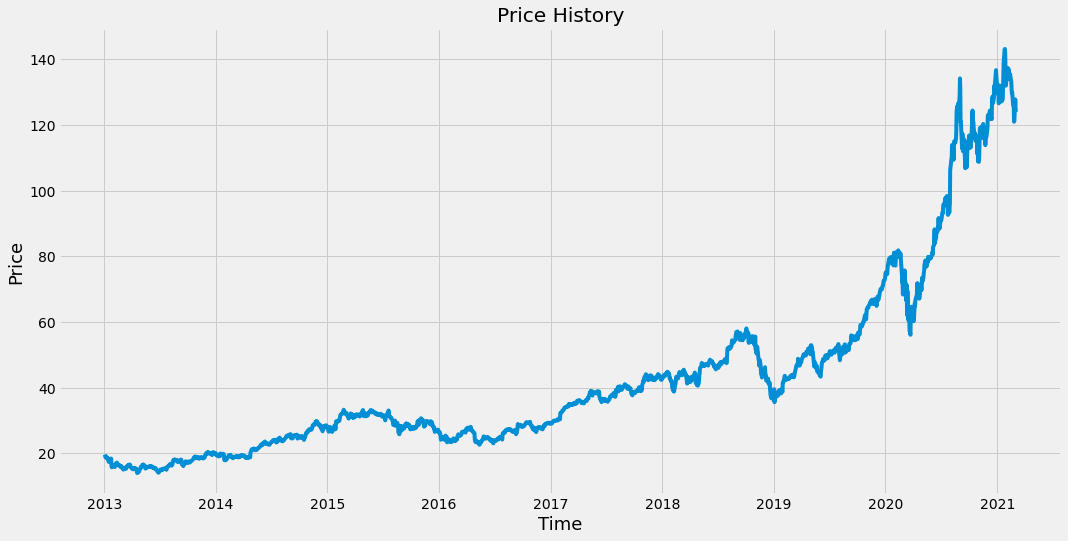

In [8]:
plt.figure(figsize=(16,8))
plt.title("Price History")
plt.xlabel("Time", fontsize=18)
plt.ylabel("Price", fontsize=18)
plt.plot(df['Close'])
plt.show()

In [ ]:
# Filter to just close column
data = df.filter(['Close'])
# Convert to np array
dataset = data.values
training_len = math.ceil(len(dataset) * 0.8)
training_len

# Scale data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

In [ ]:
# Create Training Data
train_data = scaled_data[0: training_len, :]

x_train = []
y_train = []

for i in range(60, training_len):
  x_train.append(train_data[i - 60:i, :]) # Get the data in the pasy 60 days
  y_train.append(train_data[i, 0])

  if i <= 60:
    print(x_train)
    print(y_train)
    print()

In [21]:
# Reshape our data
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Build our LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))

# Densely Connected NN
model.add(Dense(30))
model.add(Dense(1))


In [23]:
# Compile our Model
model.compile(optimizer="rmsprop", loss="mean_squared_error")
model.fit(x_train, y_train, batch_size=1)

2188/2188 [==============================] - 45s 19ms/step - loss: 4.3662e-04


In [29]:
test_data = scaled_data[training_len-60:, :]
x_test = []
y_test = dataset[training_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, :])

# Reshape
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

# Get Prediction
pred = model.predict(x_test)
pred = scaler.inverse_transform(pred)


In [30]:
# See total error in predication

rmse = np.sqrt(np.mean(pred - y_test) ** 2)
rmse

4.319124364343827

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


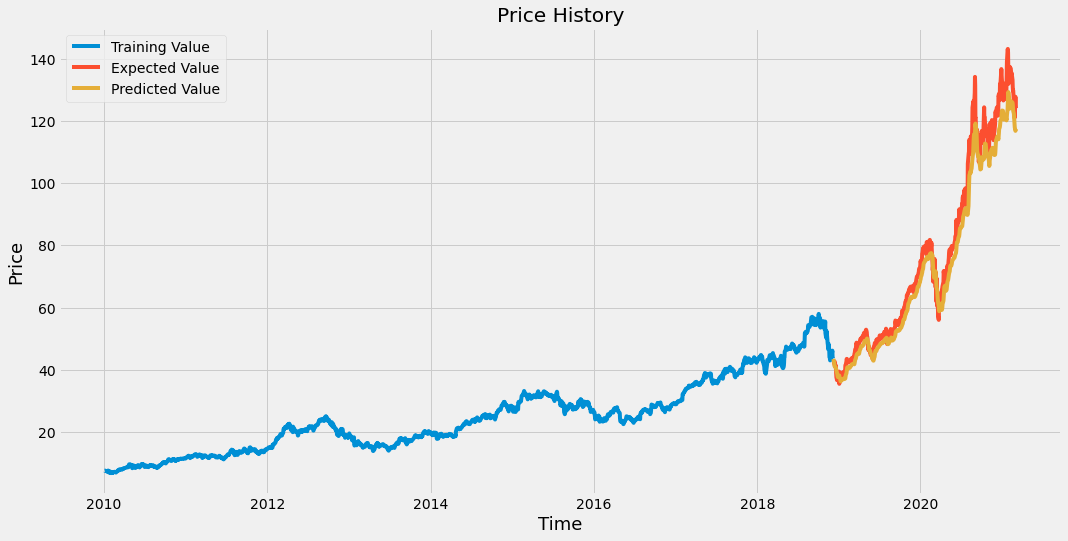

In [32]:
# Set up some plot data
train = data[:training_len]
expected = data[training_len:]
expected['Predictions'] = pred

# Visualize Output
plt.figure(figsize=(16,8))
plt.title("Price History")
plt.xlabel("Time", fontsize=18)
plt.ylabel("Price", fontsize=18)
plt.plot(train['Close'])
plt.plot(expected[['Close', 'Predictions']])
plt.legend(["Training Value", "Expected Value", "Predicted Value"])
plt.show()


In [33]:
quote = web.DataReader('AAPL', data_source='yahoo', start='2010-01-01', end='2021-03-03')
new_df = quote.filter(['Close'])
# Last 60
last_60 = new_df[-60:]
# Scale
last_60_scaled = scaler.fit_transform(last_60)

# Test data
x_last = []
x_last.append(last_60_scaled)
# Convert and Reshape
x_last = np.array(x_last)
x_last = np.reshape(x_last, (x_last.shape[0], x_last.shape[1], 1))

prediction_price = model.predict(x_last)
prediction_price = scaler.inverse_transform(prediction_price)

prediction_price


array([[125.78327]], dtype=float32)